In [1]:
import pandas as pd

In [49]:
df = pd.read_csv('pax_all_agreements_data.csv')

In [3]:
df.shape

(1868, 266)

In [4]:
df['GCh'].value_counts()

0    1550
1     122
2     116
3      80
Name: GCh, dtype: int64

In [5]:
df.groupby(['PP'])['GCh'].transform(lambda x: x.value_counts().idxmax())

0       0
1       0
2       0
3       0
4       0
       ..
1863    0
1864    0
1865    3
1866    3
1867    3
Name: GCh, Length: 1868, dtype: int64

In [6]:
pd.DataFrame(df.groupby(['PP'])['GCh'].value_counts())

GCh
PP  GCh     
1   0      2
2   0     15
    1      4
    2      2
    3      1
...      ...
158 0     19
    1      1
    3      1
159 0      1
160 0      1

[307 rows x 1 columns]

In [7]:
df[df['PP']==2]['GCh'].value_counts()

0    15
1     4
2     2
3     1
Name: GCh, dtype: int64

In [8]:
df.groupby(['PP', 'AgtId']).sum()

Ver  Lgt  N_characters  Loc1GWNO  Loc2GWNO  UcdpAgr  PamAgr  \
PP  AgtId                                                                
1   409      1    7         10644     700.0       0.0   1128.0     0.0   
    482      1    2          2434     700.0       0.0   1565.0     0.0   
2   272      1   13         23377     700.0       0.0      0.0     0.0   
    553      1    5          8371     700.0       0.0      0.0     0.0   
    705      1    3          8807     700.0       0.0      0.0     0.0   
...        ...  ...           ...       ...       ...      ...     ...   
158 1767     1    1          1795     790.0       0.0      0.0     0.0   
    1768     1    1          1594     790.0       0.0      0.0     0.0   
    1797     1    1          2541     790.0       0.0      0.0     0.0   
159 2292     4    6         11789     432.0     436.0      0.0     0.0   
160 2291     4    6          8045     482.0     625.0      0.0     0.0   

           CowWar  GCh  GChRhet  ...  TjRep  TjRSym  TjRMa  TjNR  ImUN  ImOth  \
PP  AgtId                        ...                                            
1   409     851.0    0        0  ...      0       0      0     0     0      0   
    482     851.0    0        0  ...      0       0      0     0     0      0   
2   272     225.0    0        0  ...      0       0      0     1     1      0   
    553     851.0    1        1  ...      0       0      0     0     1      0   
    705     225.0    0        0  ...      0       0      0     0     1      0   
...           ...  ...      ...  ...    ...     ...    ...   ...   ...    ...   
158 1767    931.0    0        0  ...      0       0      0     0     0      0   
    1768    931.0    0        0  ...      0       0      0     0     0      0   
    1797    931.0    0        0  ...      2       0      1     0     0      0   
159 2292      0.0    0        0  ...      0       0      0     0     0      0   
160 2291      0.0    0        0  ...      0       0      0     0     0      0   

           ImRef  ImPK  ImE  ImSrc  
PP  AgtId                           
1   409        0     0    0      1  
    482        0     0    0      1  
2   272        0     1    0      1  
    553        0     0    0      1  
    705        0     0    0      1  
...          ...   ...  ...    ...  
158 1767       0     0    0      1  
    1768       0     0    0      1  
    1797       0     0    0      1  
159 2292       0     0    0      1  
160 2291       0     0    1      1  

[1868 rows x 248 columns]

In [9]:
df['PP'].value_counts().head(20)

90     124
125    124
138     65
43      51
99      45
87      42
127     41
97      38
9       35
62      35
80      35
63      33
109     31
81      30
69      30
123     28
101     27
88      26
72      26
107     26
Name: PP, dtype: int64

In [16]:
rules = df[[
 'GChRhet',
 'GChAntid',
 'GChSubs',
 'GChOth',
 'GDisRhet',
 'GDisAntid',
 'GDisSubs',
 'GDisOth',
 'GAgeRhet',
 'GAgeAntid',
 'GAgeSubs',
 'GAgeOth',
 'GMigRhet',
 'GMigAntid',
 'GMigSubs',
 'GMigOth',
 'GRaRhet',
 'GRaAntid',
 'GRaSubs',
 'GRaOth',
 'GReRhet',
 'GReAntid',
 'GReSubs',
 'GReOth', 
 'GIndRhet',
 'GIndAntid',
 'GIndSubs',
 'GIndOth',
 'GOthRhet',
 'GOthAntid',
 'GOthSubs',
 'GOthOth',
 'GRefRhet',
 'GRefSubs',
 'GRefOth',
 'GSocRhet',
 'GSocAntid',
 'GSocSubs',
 'GSocOth',
 'GeWom',
 'GeMe',
 'GeMeNu',
 'GeMeOth',
 'GeLgbti',
 'GeLgbtiPos',
 'GeLgbtiNeg',
 'GeFa',
 'StDef',
 'StGen',
 'StCon',
 'StSd',
 'StRef',
 'StSym',
 'StInd',
 'StUni',
 'StBor',
 'StXbor',
 'PolGen',
 'PolNewInd',
 'PolNewTemp',
 'PolParTrans',
 'PolParOth',
 'Civso',
 'Tral',
 'Pubad',
 'PpsSt',
 'PpsSub',
 'PpsEx',
 'PpsOro',
 'PpsOthPr',
 'PpsVet',
 'PpsAut',
 'PpsInt',
 'PpsOth',
 'TpsSub',
 'TpsLoc',
 'TpsAut',
 'TpsOth',
 'EpsRes',
 'EpsFis',
 'EpsOth',
 'MpsMe',
 'MpsJt',
 'MpsPro',
 'MpsOth',
 'HrGen',
 'ProtCiv',
 'ProtGrp',
 'ProtLgl',
 'ProtOth',
 'HrfSp',
 'HrfBor',
 'HrfTinc',
 'HrfOth',
 'HrCp',
 'CprLife',
 'CprTort',
 'CprEq',
 'CprSlav',
 'CprLib',
 'CprDet',
 'CprFmov',
 'CprFspe',
 'CprFass',
 'CprTria',
 'CprPriv',
 'CprVote',
 'CprReli',
 'CprOth',
 'HrSec',
 'SerProp',
 'SerWork',
 'SerHeal',
 'SerEdu',
 'SerStdl',
 'SerShel',
 'SerSs',
 'SerCult',
 'SerOth',
 'HrNiMe',
 'HrNiNe',
 'HrNiOth',
 'HrIiMon',
 'HrIiBod',
 'HrIiOth',
 'HrMob',
 'HrDet',
 'MedGov',
 'MedSubs',
 'MedLog',
 'MedOth',
 'CitGen',
 'CitRights',
 'CitDef',
 'CitOth',
 'JusCr',
 'JusCrSp',
 'JusCrSys',
 'JusCrPow',
 'JusEm',
 'JusJu',
 'JusPri',
 'JusTra',
 'DevSoc',
 'DevHum',
 'DevInfra',
 'NEC',
 'NatRes',
 'IntFu',
 'TaxPo',
 'TaxRef',
 'TaxOth',
 'Ban',
 'CenBan',
 'BanPers',
 'BanInt',
 'BanXb',
 'LaRef',
 'LaRefMan',
 'LaRefRet',
 'LaRefOth',
 'LaNom',
 'LaCH',
 'LaCHTa',
 'LaCHIt',
 'LaCHPro',
 'LaCHOth',
 'LaEn',
 'Wat',
 'SsrGua',
 'CeProv',
 'CeGen', 
 'DdrDemil',
 'DdrProg',
 'SsrPsf',
 'SsrFf',
 'Terr',
 'TjAmPro',
 'TjSan',
 'TjPower',
 'TjAmBan',
 'TjJaNc',
 'TjJaIc',
 'TjRSym',
 'TjRMa',
 'ImUN',
 'ImOth',
 'ImRef',
 'ImPK',
 'ImE',
 'ImSrc']]

In [27]:
df = pd.read_csv('dfT.csv', delimiter=';')

In [36]:
df = df.drop(['Con',
 'Contp',
 'PP',
 'PPName',
 'Reg',
 'AgtId',
 'Ver',
 'Agt',
 'Dat',
 'Status',
 'Lgt',
 'N_characters',
 'Agtp',
 'StageSub',
 'Part',
 'ThrdPart',
 'OthAgr',
 'State Conflict',
 'Civil Rigths',
 'Economics Rights',], axis = 1)

In [37]:
# Decision Tree - label -> Stage, Pregunta, característiques registres Caesefire
X = df.drop(['Stage'], axis = 1)
y = df['Stage']

In [38]:
# Import train_test_split
from sklearn.model_selection import train_test_split

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=2)
# Import Decision Tree classifier
from sklearn.tree import DecisionTreeClassifier

# Import accuracy_score
from sklearn.metrics import accuracy_score

# Initialize classification model
clf = DecisionTreeClassifier(random_state=2)

# Fit model on training data
clf.fit(X_train, y_train)

# Make predictions for test data
y_pred = clf.predict(X_test)

# Calculate accuracy
accuracy_score(y_pred, y_test)

0.4025695931477516

In [39]:
# Import RandomizedSearchCV
from sklearn.model_selection import RandomizedSearchCV

def randomized_search_clf(params, runs=20, clf=DecisionTreeClassifier(random_state=2)):

    # Instantiate GridSearchCV as grid_reg
    rand_clf = RandomizedSearchCV(clf, params, n_iter=runs, 
                                  cv=5, n_jobs=-1, random_state=2)
    
    # Fit grid_reg on X_train and y_train
    rand_clf.fit(X_train, y_train)

    # Extract best estimator
    best_model = rand_clf.best_estimator_
    
    # Extract best score
    best_score = rand_clf.best_score_

    # Print best score
    print("Training score: {:.3f}".format(best_score))

    # Predict test set labels
    y_pred = best_model.predict(X_test)

    # Compute accuracy
    accuracy = accuracy_score(y_test, y_pred)

    # Print accuracy
    print('Test score: {:.3f}'.format(accuracy))
        
    # Return best model
    return best_model

In [40]:
randomized_search_clf(params={'criterion':['entropy', 'gini'],
                              'splitter':['random', 'best'],
                          'min_weight_fraction_leaf':[0.0, 0.0025, 0.005, 0.0075, 0.01],
                          'min_samples_split':[2, 3, 4, 5, 6, 8, 10],
                          'min_samples_leaf':[1, 0.01, 0.02, 0.03, 0.04],
                          'min_impurity_decrease':[0.0, 0.0005, 0.005, 0.05, 0.10, 0.15, 0.2],
                          'max_leaf_nodes':[10, 15, 20, 25, 30, 35, 40, 45, 50, None],
                          'max_features':['auto', 0.95, 0.90, 0.85, 0.80, 0.75, 0.70],
                          'max_depth':[4,5,6],
                          'min_weight_fraction_leaf':[0.0, 0.0025, 0.005, 0.0075, 0.01, 0.05]
                         })

Training score: 0.460
Test score: 0.471


DecisionTreeClassifier(criterion='entropy', max_depth=6, max_features=0.75,
                       max_leaf_nodes=25, min_impurity_decrease=0.0005,
                       min_samples_split=5, min_weight_fraction_leaf=0.0075,
                       random_state=2)

In [43]:
from sklearn.model_selection import cross_val_score
import numpy as np

model = DecisionTreeClassifier(criterion='entropy', max_depth=5, max_features=0.75,
                       max_leaf_nodes=25, min_impurity_decrease=0.0005,
                       min_samples_split=5, min_weight_fraction_leaf=0.0075,
                       random_state=2)

# Fit model on training data
model.fit(X_train, y_train)

# Make predictions for test data
y_pred = model.predict(X_test)

# Obtain scores of cross-validation
scores = cross_val_score(model, X, y, cv=5)

# Display accuracy
print('Accuracy:', np.round(scores, 2))

# Display mean accuracy
print('Accuracy mean: %0.2f' % (scores.mean()))

Accuracy: [0.44 0.46 0.44 0.41 0.46]
Accuracy mean: 0.44


C:\Users\marco\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:670: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"


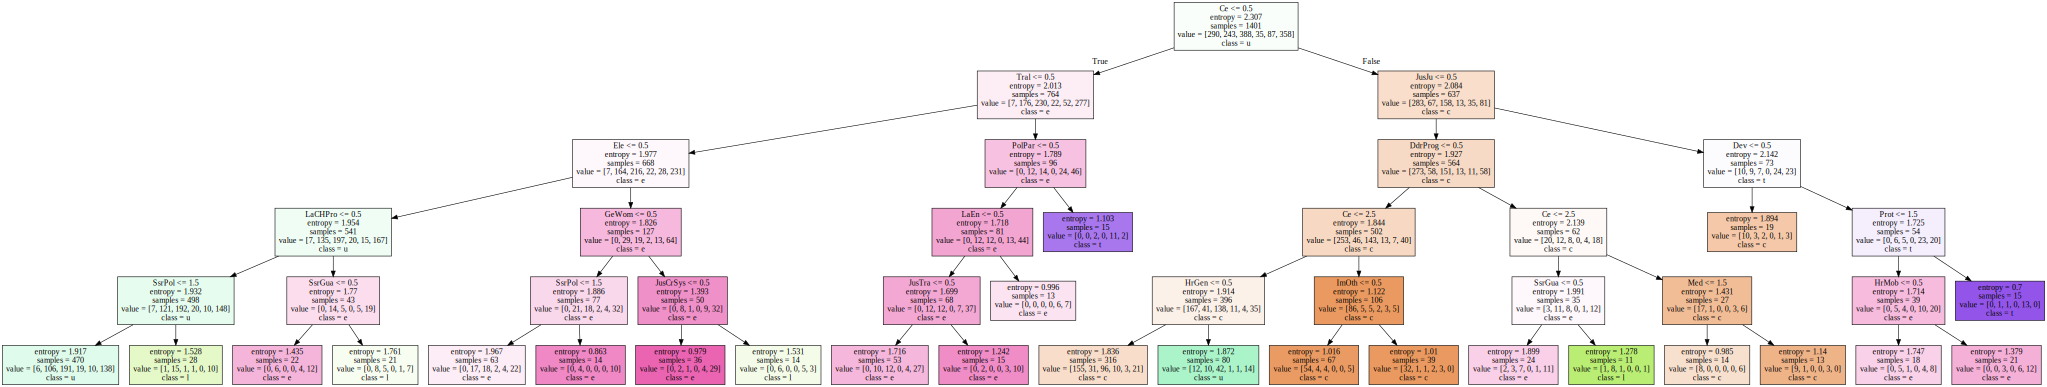

In [44]:
from sklearn import tree
import graphviz
# DOT data
dot_data = tree.export_graphviz(model, out_file=None, 
                                feature_names=X.columns,  
                                class_names='cluster',
                                filled=True)

# Draw graph
graph = graphviz.Source(dot_data, format="png") 
graph

In [50]:
rules = df[[
 'GChRhet',
 'GChAntid',
 'GChSubs',
 'GChOth',
 'GDisRhet',
 'GDisAntid',
 'GDisSubs',
 'GDisOth',
 'GAgeRhet',
 'GAgeAntid',
 'GAgeSubs',
 'GAgeOth',
 'GMigRhet',
 'GMigAntid',
 'GMigSubs',
 'GMigOth',
 'GRaRhet',
 'GRaAntid',
 'GRaSubs',
 'GRaOth',
 'GReRhet',
 'GReAntid',
 'GReSubs',
 'GReOth', 
 'GIndRhet',
 'GIndAntid',
 'GIndSubs',
 'GIndOth',
 'GOthRhet',
 'GOthAntid',
 'GOthSubs',
 'GOthOth',
 'GRefRhet',
 'GRefSubs',
 'GRefOth',
 'GSocRhet',
 'GSocAntid',
 'GSocSubs',
 'GSocOth',
 'GeWom',
 'GeMe',
 'GeMeNu',
 'GeMeOth',
 'GeLgbti',
 'GeLgbtiPos',
 'GeLgbtiNeg',
 'GeFa',
 'StDef',
 'StGen',
 'StCon',
 'StSd',
 'StRef',
 'StSym',
 'StInd',
 'StUni',
 'StBor',
 'StXbor',
 'PolGen',
 'PolNewInd',
 'PolNewTemp',
 'PolParTrans',
 'PolParOth',
 'Civso',
 'Tral',
 'Pubad',
 'PpsSt',
 'PpsSub',
 'PpsEx',
 'PpsOro',
 'PpsOthPr',
 'PpsVet',
 'PpsAut',
 'PpsInt',
 'PpsOth',
 'TpsSub',
 'TpsLoc',
 'TpsAut',
 'TpsOth',
 'EpsRes',
 'EpsFis',
 'EpsOth',
 'MpsMe',
 'MpsJt',
 'MpsPro',
 'MpsOth',
 'HrGen',
 'ProtCiv',
 'ProtGrp',
 'ProtLgl',
 'ProtOth',
 'HrfSp',
 'HrfBor',
 'HrfTinc',
 'HrfOth',
 'HrCp',
 'CprLife',
 'CprTort',
 'CprEq',
 'CprSlav',
 'CprLib',
 'CprDet',
 'CprFmov',
 'CprFspe',
 'CprFass',
 'CprTria',
 'CprPriv',
 'CprVote',
 'CprReli',
 'CprOth',
 'HrSec',
 'SerProp',
 'SerWork',
 'SerHeal',
 'SerEdu',
 'SerStdl',
 'SerShel',
 'SerSs',
 'SerCult',
 'SerOth',
 'HrNiMe',
 'HrNiNe',
 'HrNiOth',
 'HrIiMon',
 'HrIiBod',
 'HrIiOth',
 'HrMob',
 'HrDet',
 'MedGov',
 'MedSubs',
 'MedLog',
 'MedOth',
 'CitGen',
 'CitRights',
 'CitDef',
 'CitOth',
 'JusCr',
 'JusCrSp',
 'JusCrSys',
 'JusCrPow',
 'JusEm',
 'JusJu',
 'JusPri',
 'JusTra',
 'DevSoc',
 'DevHum',
 'DevInfra',
 'NEC',
 'NatRes',
 'IntFu',
 'TaxPo',
 'TaxRef',
 'TaxOth',
 'Ban',
 'CenBan',
 'BanPers',
 'BanInt',
 'BanXb',
 'LaRef',
 'LaRefMan',
 'LaRefRet',
 'LaRefOth',
 'LaNom',
 'LaCH',
 'LaCHTa',
 'LaCHIt',
 'LaCHPro',
 'LaCHOth',
 'LaEn',
 'Wat',
 'SsrGua',
 'CeProv',
 'CeGen', 
 'DdrDemil',
 'DdrProg',
 'SsrPsf',
 'SsrFf',
 'Terr',
 'TjAmPro',
 'TjSan',
 'TjPower',
 'TjAmBan',
 'TjJaNc',
 'TjJaIc',
 'TjRSym',
 'TjRMa',
 'ImUN',
 'ImOth',
 'ImRef',
 'ImPK',
 'ImE',
 'ImSrc']]

In [52]:
rules[rules.loc[:,:] > 1] = 1

<ipython-input-52-7ad99a1c7c1f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rules[rules.loc[:,:] > 1] = 1
C:\Users\marco\anaconda3\lib\site-packages\pandas\core\frame.py:3089: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._where(-key, value, inplace=True)


In [53]:
from mlxtend.frequent_patterns import apriori, association_rules
frq_items = apriori(rules, min_support = 0.001, use_colnames= True)

MemoryError: Unable to allocate 1.57 TiB for an array with shape (28935034, 4, 1868) and data type int64